## Supplement 3: Regression

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

### 3.2 Programming Task: Gradient Descent
Consider the function $J(\boldsymbol{w})=J(w_1, w_2) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot using the Matplotlib module. 

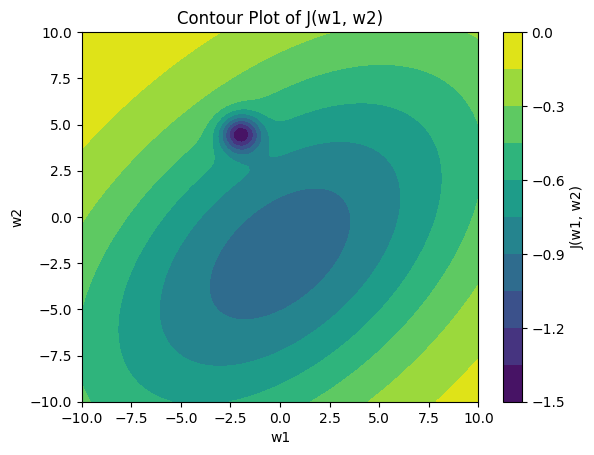

In [2]:
# TODO: Define function J(w)
def J(w1, w2):
    term1 = -np.exp(-1/100 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5))
    term2 = -2 * np.exp(-(w1**2 + w2**2 + 4*w1 - 9*w2 + 25))
    return term1 + term2

w1 = np.linspace(-10, 10, 100)  
w2 = np.linspace(-10, 10, 100)  
W1, W2 = np.meshgrid(w1, w2)  
J_values = J(W1, W2)
plt.contourf(W1, W2, J_values, levels=10, cmap='viridis')  
plt.colorbar(label='J(w1, w2)')  
plt.xlabel("w1")
plt.ylabel("w2")
plt.title("Contour Plot of J(w1, w2)")
plt.show()

ii\. Obtain the gradient of the above function by hand.
            
  $Hint:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

iii\. Implement gradient descent algorithm described in the lecture to find the minimum of this
            function using the NumPy module. Plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

Converged in 5845 iterations.


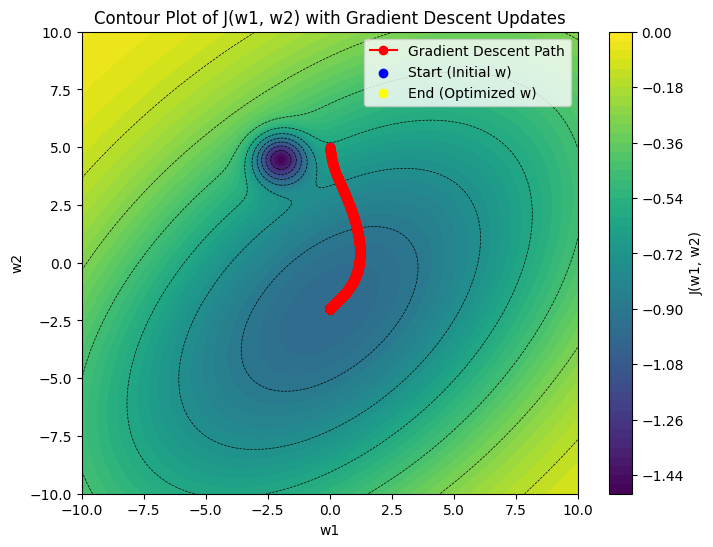

In [3]:
# TODO: Define function gradient_J(w)
def gradient_J(w1, w2):
    partial_w1 = (
        (1/50) * np.exp(-1/100 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5)) *
        (2*w1 - w2 - 2)
        + 2 * np.exp(-(w1**2 + w2**2 + 4*w1 - 9*w2 + 25)) * (2*w1 + 4)
    )
    
    partial_w2 = (
        (1/50) * np.exp(-1/100 * (w1**2 + w2**2 - w1*w2 - 2*w1 + 4*w2 + 5)) *
        (2*w2 - w1 + 4)
        + 2 * np.exp(-(w1**2 + w2**2 + 4*w1 - 9*w2 + 25)) * (2*w2 - 9)
    )
    
    return np.array([partial_w1, partial_w2])

# TODO: Define the gradient descent algorithm as function
def gradient_descent(initial_w, learning_rate, max_iterations, tolerance):
    w = np.array(initial_w, dtype=float)
    w_history = [w.copy()]  
    
    for i in range(max_iterations):
        grad = gradient_J(w[0], w[1])  
        w = w - learning_rate * grad   
        w_history.append(w.copy())    
        
        if np.linalg.norm(grad) < tolerance: 
            print(f"Converged in {i+1} iterations.")
            break
    else:
        print("Reached maximum iterations without convergence.")
    
    return np.array(w_history)  

# TODO: Train w 
# Store each update of w in an array to make plot later.
#initial_w = np.random.uniform(-10, 10, size=2)
initial_w = [0, 5]
learning_rate = 0.1
max_iterations = 6000
tolerance = 1e-6
w_updates = gradient_descent(initial_w, learning_rate, max_iterations, tolerance)

# TODO: Prepare contour plot and mark each weight update on the plot.
# Prepare contour plot
w1_range = np.linspace(-10, 10, 200)
w2_range = np.linspace(-10, 10, 200)
W1, W2 = np.meshgrid(w1_range, w2_range)
J_values = J(W1, W2)
plt.figure(figsize=(8, 6))
plt.contourf(W1, W2, J_values, levels=50, cmap='viridis')
plt.colorbar(label="J(w1, w2)")
plt.contour(W1, W2, J_values, levels=10, colors='black', linewidths=0.5)
w_updates = np.array(w_updates)
plt.plot(w_updates[:, 0], w_updates[:, 1], 'r-o', label="Gradient Descent Path")
plt.scatter(w_updates[0, 0], w_updates[0, 1], color='blue', label="Start (Initial w)")
plt.scatter(w_updates[-1, 0], w_updates[-1, 1], color='yellow', label="End (Optimized w)")
plt.xlabel("w1")
plt.ylabel("w2")
plt.title("Contour Plot of J(w1, w2) with Gradient Descent Updates")
plt.legend()
plt.show()

### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

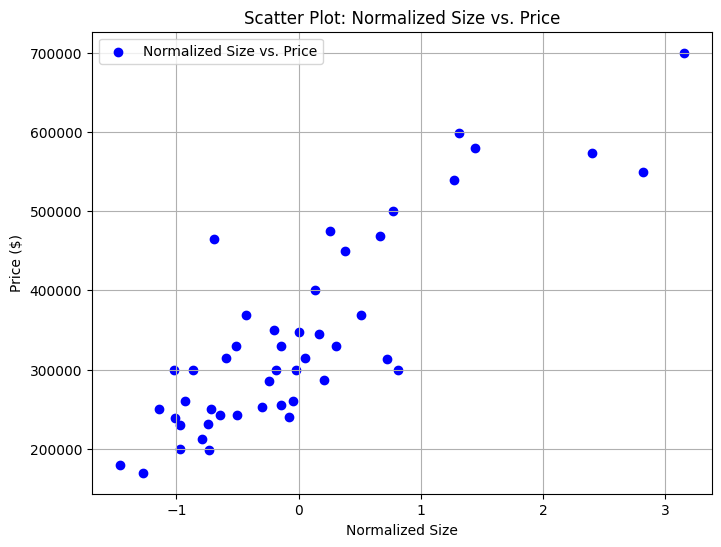

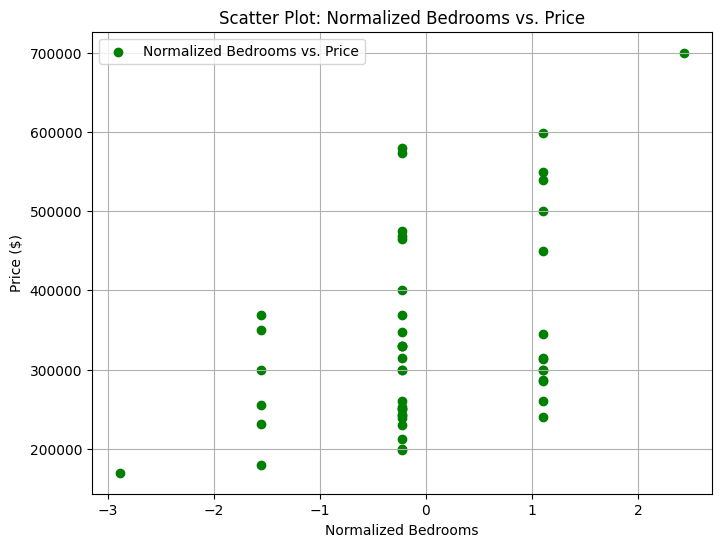

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read and prepare data
data = np.loadtxt("house_prices.txt", delimiter=",")
size = data[:, 0]      # Size
bedrooms = data[:, 1]  # Number of bedrooms
price = data[:, 2]     # Price ($)

# Step 2: Normalize features
size_mean = np.mean(size)
size_std = np.std(size)
bedrooms_mean = np.mean(bedrooms)
bedrooms_std = np.std(bedrooms)

size_normalized = (size - size_mean) / size_std
bedrooms_normalized = (bedrooms - bedrooms_mean) / bedrooms_std

# Combine normalized features into X
X = np.c_[size_normalized, bedrooms_normalized]  
y = price  

# Normalized Size vs. Price
plt.figure(figsize=(8, 6))
plt.scatter(size_normalized, price, c='blue', label="Normalized Size vs. Price")
plt.xlabel("Normalized Size")
plt.ylabel("Price ($)")
plt.title("Scatter Plot: Normalized Size vs. Price")
plt.legend()
plt.grid(True)
plt.show()

# Normalized Bedrooms vs. Price
plt.figure(figsize=(8, 6))
plt.scatter(bedrooms_normalized, price, c='green', label="Normalized Bedrooms vs. Price")
plt.xlabel("Normalized Bedrooms")
plt.ylabel("Price ($)")
plt.title("Scatter Plot: Normalized Bedrooms vs. Price")
plt.legend()
plt.grid(True)
plt.show()


ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$, 
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$
    is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\
    x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and
    $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour
    plot. You may rescale the data if required. 

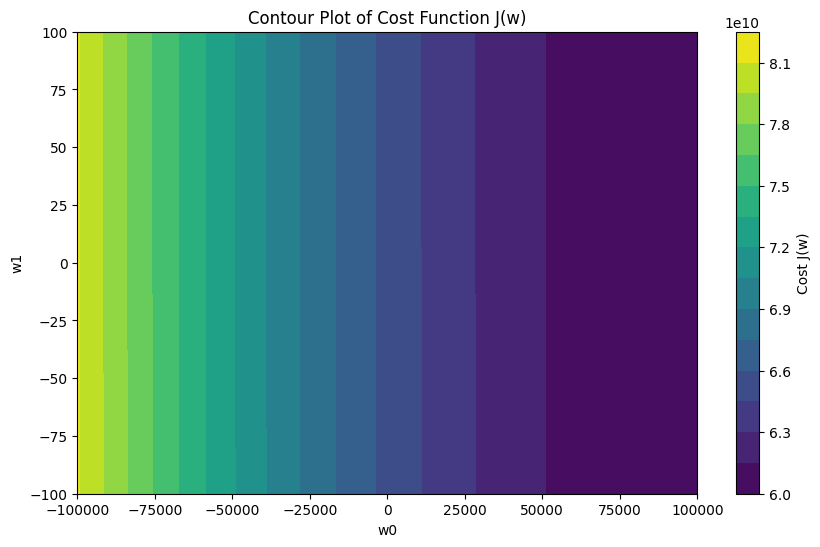

In [5]:
# TODO: Define function J(w)
def J(w, X, y):
    n = len(y)  
    predictions = X @ w  
    errors = predictions - y  
    cost = (1 / (2 * n)) * np.sum(errors**2)  
    return cost

# TODO: Define function gradient_J(w)
def gradient_J(w, X, y):
    n = len(y)  
    predictions = X @ w  
    errors = predictions - y  
    grad = (1 / n) * (X.T @ errors)  
    return grad

# TODO: Plot the cost function
def plot_cost_function():
    w0_vals = np.linspace(-1e5, 1e5, 100) 
    w1_vals = np.linspace(-100, 100, 100)  
    W0, W1 = np.meshgrid(w0_vals, w1_vals)  
    w2 = 0 
    J_vals = np.zeros_like(W0)
    for i in range(W0.shape[0]):
        for j in range(W0.shape[1]):
            w = np.array([W0[i, j], W1[i, j], w2])[:X.shape[1]] 
            J_vals[i, j] = J(w, X, y)  
    # Step 3: Plot contour
    plt.figure(figsize=(10, 6))
    contour = plt.contourf(W0, W1, J_vals, levels=20, cmap="viridis")
    plt.colorbar(contour, label="Cost J(w)")
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.title("Contour Plot of Cost Function J(w)")
    plt.show()

plot_cost_function()

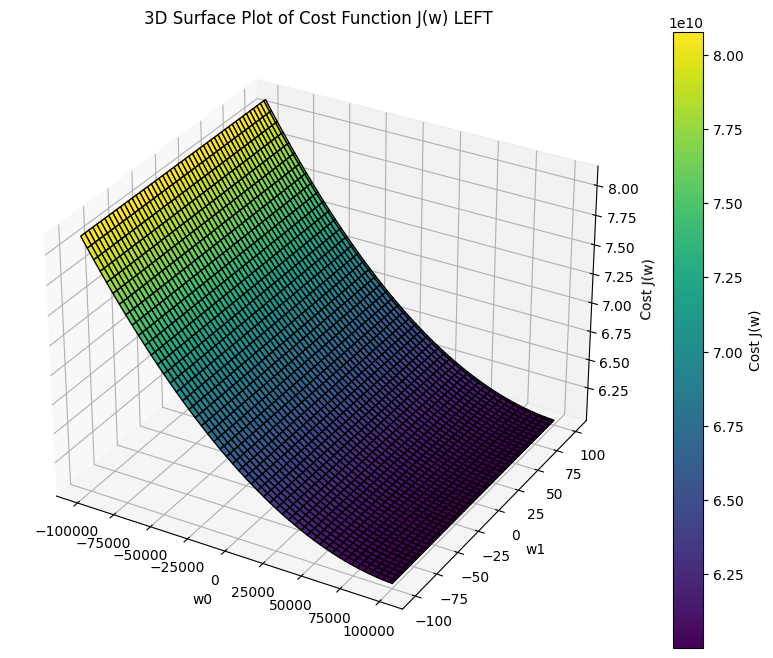

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot_cost_function_3d():
    w0_vals = np.linspace(-1e5, 1e5, 100)  # Bias term (w0)
    w1_vals = np.linspace(-100, 100, 100)  # Weight for size (w1)
    W0, W1 = np.meshgrid(w0_vals, w1_vals)  

    J_vals = np.zeros_like(W0)
    for i in range(W0.shape[0]):
        for j in range(W0.shape[1]):
            w = np.array([W0[i, j], W1[i, j]])[:X.shape[1]] 
            J_vals[i, j] = J(w, X, y) 

    # Step 3: Plot 3D surface
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(W0, W1, J_vals, cmap="viridis", edgecolor="k")
    fig.colorbar(surface, ax=ax, label="Cost J(w)")
    ax.set_xlabel("w0")
    ax.set_ylabel("w1")
    ax.set_zlabel("Cost J(w)")
    ax.set_title("3D Surface Plot of Cost Function J(w) LEFT")
    plt.show()
    
# Call the function to plot in 3D
plot_cost_function_3d()

Converged in 542 iterations.
Optimized weights: [109447.79646816  -6578.35485268]
Final cost: 59983669449.88416


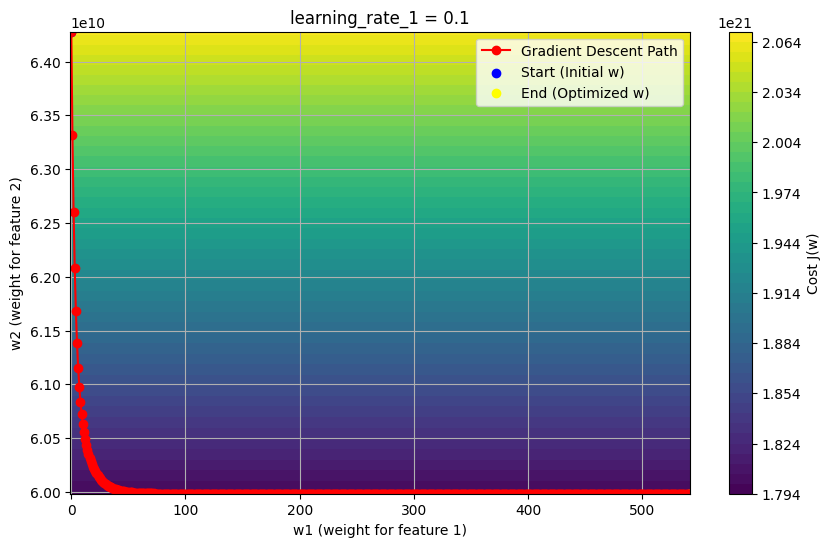

In [7]:
def gradient_descent(X, y, initial_w, learning_rate, max_iterations, tolerance=1e-6):
    n = len(y)  
    w = np.array(initial_w, dtype=float) 
    history = [] 
    
    for i in range(max_iterations):
        grad = gradient_J(w, X, y)
        w = w - learning_rate * grad
        cost = J(w, X, y)
        history.append((i, cost))
        
        if np.linalg.norm(grad) < tolerance:
            print(f"Converged in {i+1} iterations.")
            break
    else:
        print("Reached maximum iterations without convergence.")
    return w, history

# TODO: Train w 
initial_w = np.array([0,0])
learning_rate = 0.1
max_iterations = 10000
tolerance = 1e-6

optimized_w, history = gradient_descent(X, y, initial_w, learning_rate, max_iterations, tolerance)
print("Optimized weights:", optimized_w)
print("Final cost:", J(optimized_w, X, y))

# TODO: Prepare contour plot and mark each weight update on the plot.
def plot_contour_with_updates(X, y, history, title):
    # Step 1: Extract weight updates directly from history
    weights = np.array(history)  
    w1_updates = weights[:, 0] 
    w2_updates = weights[:, 1]  
    
    w1_vals = np.linspace(min(w1_updates) - 1, max(w1_updates) + 1, 100)
    w2_vals = np.linspace(min(w2_updates) - 1, max(w2_updates) + 1, 100)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)  
    
    J_vals = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            w = np.array([W1[i, j], W2[i, j]]) 
            J_vals[i, j] = J(w, X, y) 
    
    plt.figure(figsize=(10, 6))
    contour = plt.contourf(W1, W2, J_vals, levels=50, cmap="viridis")
    plt.colorbar(contour, label="Cost J(w)")
    plt.xlabel("w1 (weight for feature 1)")
    plt.ylabel("w2 (weight for feature 2)")
    plt.title(title)
    
    plt.plot(w1_updates, w2_updates, 'r-o', label="Gradient Descent Path")
    plt.scatter(w1_updates[0], w2_updates[0], color='blue', label="Start (Initial w)")
    plt.scatter(w1_updates[-1], w2_updates[-1], color='yellow', label="End (Optimized w)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_contour_with_updates(X, y, history, "learning_rate_1 = 0.1")

* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

Converged in 542 iterations.
Optimized weights: [109447.79646816  -6578.35485268]
Final cost: 59983669449.88416


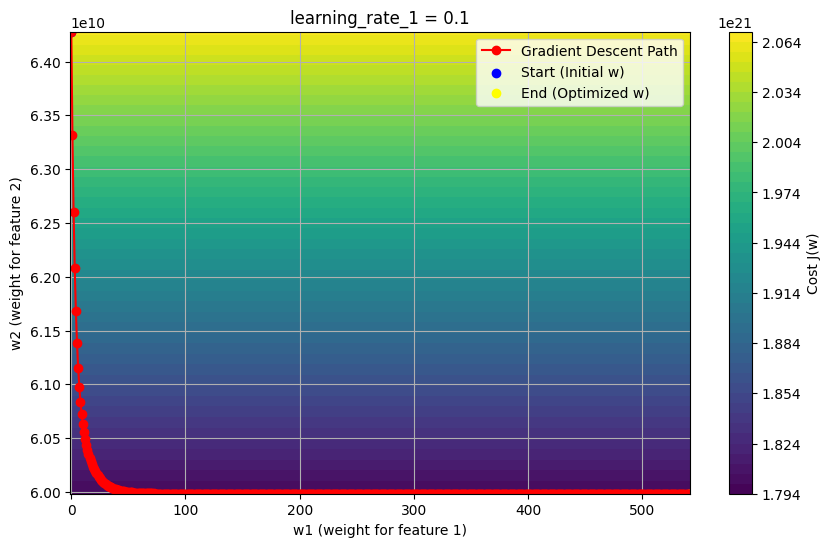

In [8]:
# TODO: Define alphas (learning rates) to test.
initial_w = np.array([0,0])
max_iterations = 10000
tolerance = 1e-6

learning_rate_1 = 0.1
learning_rate_2 = 0.01
learning_rate_3 = 0.08
learning_rate_4 = 0.5
learning_rate_5 = 1
learning_rate_6 = 0.05

# TODO: Repeat the experiment for each alpha and observe the contour plot in each case.
optimized_w, history = gradient_descent(X, y, initial_w, learning_rate_1, max_iterations, tolerance)
print("Optimized weights:", optimized_w)
print("Final cost:", J(optimized_w, X, y))
plot_contour_with_updates(X, y, history, "learning_rate_1 = 0.1")

Converged in 5514 iterations.
Optimized weights: [109447.79646805  -6578.35485257]
Final cost: 59983669449.884186


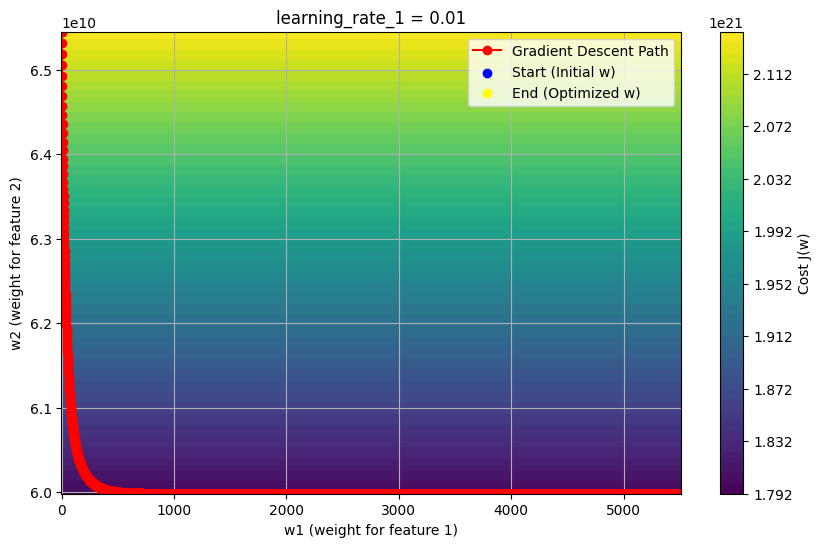

In [9]:
optimized_w, history = gradient_descent(X, y, initial_w, learning_rate_2, max_iterations, tolerance)
print("Optimized weights:", optimized_w)
print("Final cost:", J(optimized_w, X, y))
plot_contour_with_updates(X, y, history, "learning_rate_1 = 0.01")

Converged in 680 iterations.
Optimized weights: [109447.79646813  -6578.35485265]
Final cost: 59983669449.884186


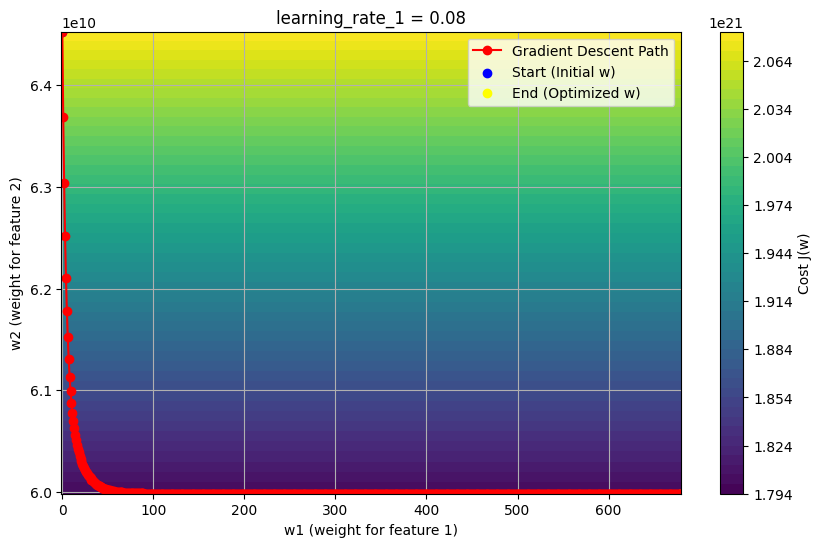

In [10]:
optimized_w, history = gradient_descent(X, y, initial_w, learning_rate_3, max_iterations, tolerance)
print("Optimized weights:", optimized_w)
print("Final cost:", J(optimized_w, X, y))
plot_contour_with_updates(X, y, history, "learning_rate_1 = 0.08")

Converged in 99 iterations.
Optimized weights: [109447.79646844  -6578.35485296]
Final cost: 59983669449.88417


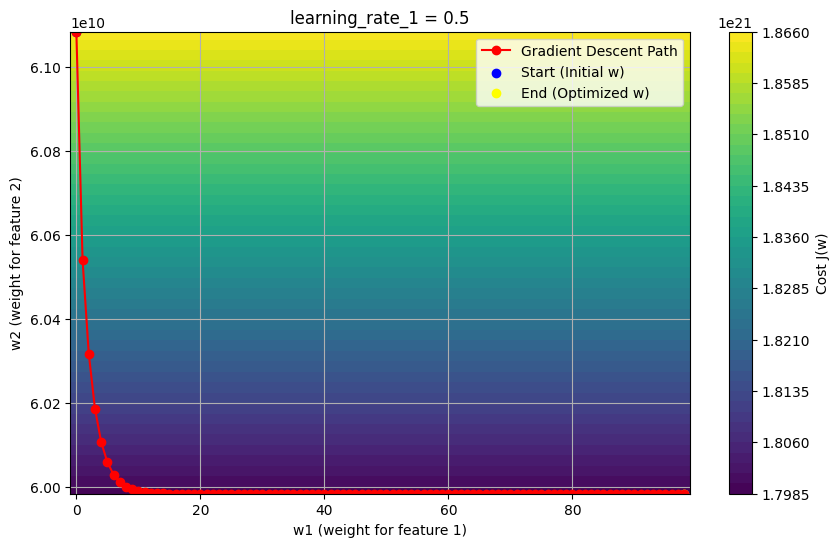

In [11]:
optimized_w, history = gradient_descent(X, y, initial_w, learning_rate_4, max_iterations, tolerance)
print("Optimized weights:", optimized_w)
print("Final cost:", J(optimized_w, X, y))
plot_contour_with_updates(X, y, history, "learning_rate_1 = 0.5")

Converged in 45 iterations.
Optimized weights: [109447.79646961  -6578.35485365]
Final cost: 59983669449.884186


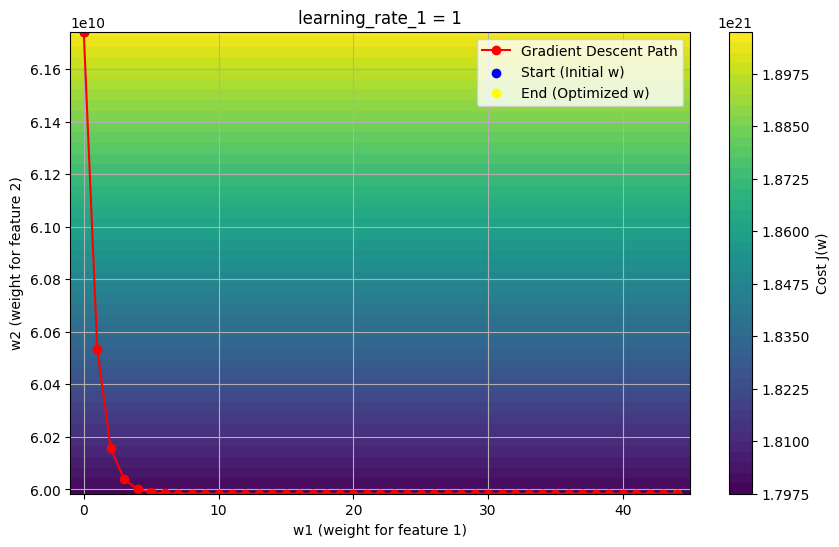

In [12]:
optimized_w, history = gradient_descent(X, y, initial_w, learning_rate_5, max_iterations, tolerance)
print("Optimized weights:", optimized_w)
print("Final cost:", J(optimized_w, X, y))
plot_contour_with_updates(X, y, history, "learning_rate_1 = 1")

Converged in 1094 iterations.
Optimized weights: [109447.79646808  -6578.3548526 ]
Final cost: 59983669449.884186


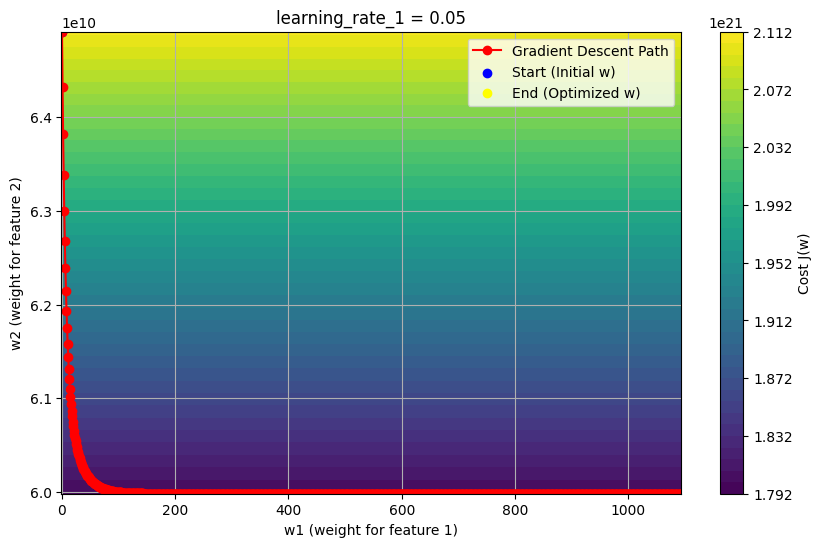

In [13]:
optimized_w, history = gradient_descent(X, y, initial_w, learning_rate_6, max_iterations, tolerance)
print("Optimized weights:", optimized_w)
print("Final cost:", J(optimized_w, X, y))
plot_contour_with_updates(X, y, history, "learning_rate_1 = 0.05")

iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [14]:
# TODO: Compute the closed form solution
def closed_form_solution(X, y):
    XtX = X.T @ X  
    XtX_inv = np.linalg.inv(XtX) 
    Xty = X.T @ y  
    w = XtX_inv @ Xty 
    return w

w_closed_form = closed_form_solution(X, y)
print("Closed-form solution weights:", w_closed_form)
print("Final cost:", J(w_closed_form, X, y))

Closed-form solution weights: [109447.79646964  -6578.35485416]
Final cost: 59983669449.884186
